In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as mt
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
os.getcwd()

'/Users/abhishek/Desktop/Python Data/3. Pandas Case Study 1 - Retail Case Study'

In [3]:
Customer = pd.read_csv('/Users/abhishek/Desktop/Python Data/3. Pandas Case Study 1 - Retail Case Study/Customer copy.csv')

In [4]:
Customer.shape
Customer.isnull().sum()
Null_Gender = np.where(Customer.Gender.isnull())
Null_CityCode = np.where(Customer.city_code.isnull())
Null_Gender
Null_CityCode
Customer = Customer.drop([24,87,115,149])

In [5]:
Customer.shape

(5643, 4)

In [6]:
Transaction = pd.read_csv('/Users/abhishek/Desktop/Python Data/3. Pandas Case Study 1 - Retail Case Study/Transactions copy.csv')
Transaction.shape
Transaction.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [7]:
Product = pd.read_csv('/Users/abhishek/Desktop/Python Data/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info copy.csv')

#### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [8]:
Pre = pd.merge(left = Customer,right = Transaction, left_on="customer_Id",right_on="cust_id", how = "inner")

In [9]:
Pre.head()
Pre.isnull().sum()
Pre.shape

(23036, 14)

In [10]:
Customer_Final = pd.merge(left = Pre,right= Product,left_on=["prod_subcat_code","prod_cat_code"],right_on=["prod_sub_cat_code","prod_cat_code"],how = "inner")

In [11]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23031,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23032,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23033,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23034,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


In [12]:
Customer_Final = Customer_Final.drop(["cust_id"],axis = 1)

In [13]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [14]:
Customer_Final.isnull().sum()

customer_Id          0
DOB                  0
Gender               0
city_code            0
transaction_id       0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

#### 2. Prepare a summary report for the merged data set.
- a. Get the column names and their corresponding data types

In [15]:
Column_Names = list(Customer_Final.columns)
Column_Names

['customer_Id',
 'DOB',
 'Gender',
 'city_code',
 'transaction_id',
 'tran_date',
 'prod_subcat_code',
 'prod_cat_code',
 'Qty',
 'Rate',
 'Tax',
 'total_amt',
 'Store_type',
 'prod_cat',
 'prod_sub_cat_code',
 'prod_subcat']

In [16]:
Customer_Final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [17]:
dob = Customer_Final.DOB
dob = pd.Series(dob)
dob1 = Customer_Final.tran_date
dob1 = pd.Series(dob1)
dob = pd.to_datetime(dob).dt.normalize()
dob
dob1 = pd.to_datetime(dob1).dt.normalize()
dob1

0       2014-01-13
1       2011-03-25
2       2011-05-23
3       2013-09-12
4       2013-05-23
           ...    
23031   2012-10-10
23032   2013-08-17
23033   2012-01-02
23034   2011-01-31
23035   2011-01-26
Name: tran_date, Length: 23036, dtype: datetime64[ns]

In [18]:
Customer_Final["DOB"] = dob
Customer_Final["tran_date"] = dob1

In [19]:
Customer_dtype = Customer_Final.dtypes
Customer_dtype

customer_Id                   int64
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
transaction_id                int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

#### b. Top/Bottom 10 observations

In [20]:
Top10 = Customer_Final.head(10)
Top10

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,1970-01-02,M,4.0,78357345891,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,1970-01-02,M,4.0,23916816961,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,1970-02-13,F,6.0,35560569829,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,1970-02-13,F,6.0,94033312891,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,272883,1970-02-19,M,5.0,35308880657,2013-01-12,7,5,-4,-1161,487.620,-5131.620,TeleShop,Books,7,Fiction


In [21]:
Bottom10 = Customer_Final.tail(10)
Bottom10

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23026,268914,1992-11-15,F,3.0,1407823655,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23027,269519,1992-11-17,M,9.0,29719500605,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23028,273524,1992-11-25,F,1.0,25762805863,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23029,272141,1992-02-12,F,10.0,71337087467,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23030,272141,1992-02-12,F,10.0,71337087467,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23031,267812,1992-04-12,F,1.0,63540378797,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23032,274618,1992-09-12,F,7.0,71793203305,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23033,268097,1992-12-15,F,7.0,91217108818,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23034,268097,1992-12-15,F,7.0,90114483354,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23035,268097,1992-12-15,F,7.0,90114483354,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [22]:
Continous_Var = Customer_Final._get_numeric_data()

In [23]:
Col_not_needed = ['customer_Id','city_code','transaction_id','prod_subcat_code','prod_cat_code','prod_sub_cat_code']

In [24]:
Continous_Var_List = list(Continous_Var.columns.difference(Col_not_needed))
Continous_Var_List

['Qty', 'Rate', 'Tax', 'total_amt']

In [25]:
Continous_Var = Customer_Final[Continous_Var_List]
Continous_Var

,Qty,Rate,Tax,total_amt
0,5,187,98.175,1033.175
1,2,464,97.440,1025.440
2,2,197,41.370,435.370
3,4,1141,479.220,5043.220
4,4,1020,428.400,4508.400
...,...,...,...,...
23031,3,224,70.560,742.560
23032,4,691,290.220,3054.220
23033,2,411,86.310,908.310
23034,-4,-1408,591.360,-6223.360


In [26]:
def quant(x):
    x = pd.Series(x)
    q = x.quantile([0,.25,.50,.75,1])
    res = q
    q.index = ["Min","Q1","Median","Q3","Max"]
    return(res)

In [27]:
Summary = Continous_Var.apply(quant)
Summary

,Qty,Rate,Tax,total_amt
Min,-5.0,-1499.0,7.3500,-8270.925
Q1,1.0,312.0,98.2800,762.450
Median,3.0,710.0,199.0800,1754.740
Q3,4.0,1109.0,365.7675,3569.150
Max,5.0,1500.0,787.5000,8287.500


#### d. Frequency tables for all the categorical variables

In [28]:
Categorical_Variable = Customer_Final.columns.difference(Continous_Var_List)
Categorical_Variable = Customer_Final[Categorical_Variable]
Categorical_Variable = Categorical_Variable.loc[:,('Gender','Store_type','city_code','prod_cat','prod_cat_code','prod_sub_cat_code','prod_subcat')]

In [29]:
#def frequecy(x):
 #   x = pd.Series(x)
  #  Fr = x.value_counts()
  #  return(Fr)

In [30]:
#Categorical_Variable.apply(frequecy)

In [31]:
Categorical_Variable

,Gender,Store_type,city_code,prod_cat,prod_cat_code,prod_sub_cat_code,prod_subcat
0,M,TeleShop,4.0,Books,5,7,Fiction
1,M,e-Shop,4.0,Books,5,7,Fiction
2,F,Flagship store,4.0,Books,5,7,Fiction
3,F,e-Shop,8.0,Books,5,7,Fiction
4,F,e-Shop,7.0,Books,5,7,Fiction
...,...,...,...,...,...,...,...
23031,F,TeleShop,1.0,Books,5,10,Non-Fiction
23032,F,Flagship store,7.0,Books,5,10,Non-Fiction
23033,F,e-Shop,7.0,Books,5,10,Non-Fiction
23034,F,e-Shop,7.0,Books,5,10,Non-Fiction


In [32]:
Gender = Categorical_Variable.Gender.value_counts()
Gender

M    11805
F    11231
Name: Gender, dtype: int64

In [33]:
StoreType = Categorical_Variable.Store_type.value_counts()
StoreType

e-Shop            9306
MBR               4659
Flagship store    4575
TeleShop          4496
Name: Store_type, dtype: int64

In [34]:
CityCode = Categorical_Variable.city_code.value_counts()
CityCode

4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2265
1.0     2258
9.0     2178
6.0     2123
Name: city_code, dtype: int64

In [35]:
ProductCat = Categorical_Variable.prod_cat.value_counts()
ProductCat

Books               6064
Electronics         4894
Home and kitchen    4126
Footwear            2998
Clothing            2957
Bags                1997
Name: prod_cat, dtype: int64

In [36]:
ProductSubCat = Categorical_Variable.prod_subcat.value_counts()
ProductSubCat

Women                  3046
Mens                   2911
Kids                   1995
Tools                  1062
Fiction                1042
Kitchen                1037
Children               1034
Mobiles                1031
Comics                 1031
Bath                   1021
Furnishing             1006
Non-Fiction            1002
DIY                     988
Cameras                 984
Personal Appliances     972
Academic                967
Computers               956
Audio and video         951
Name: prod_subcat, dtype: int64

In [37]:
ProdSubCatCode = Categorical_Variable.groupby(by = ["prod_cat_code"])[["prod_sub_cat_code"]].sum().add_prefix("_").reset_index()
ProdSubCatCode

,prod_cat_code,_prod_sub_cat_code
0,1,7832
1,2,8118
2,3,35046
3,4,4982
4,5,49313
5,6,36357


#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

- Histogram for Continous Variables

In [38]:
Continous_Var.columns

Index(['Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

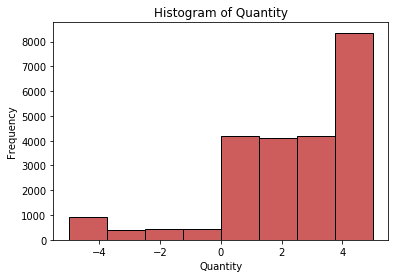

In [39]:
Continous_Var.Qty.plot(kind = "hist", bins = 8, color = "indianred", edgecolor = "black")
plt.xlabel("Quantity")
plt.title("Histogram of Quantity")
plt.show()

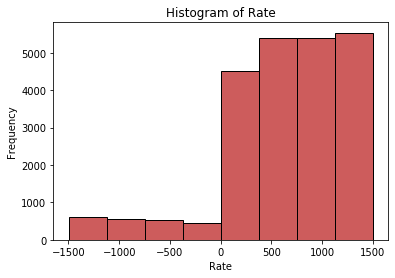

In [40]:
Continous_Var.Rate.plot(kind = "hist", bins = 8, color = "indianred", edgecolor = "black")
plt.xlabel("Rate")
plt.title("Histogram of Rate")
plt.show()

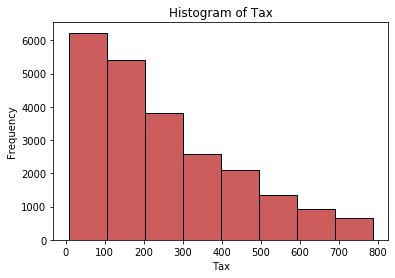

In [41]:
Continous_Var.Tax.plot(kind = "hist", bins = 8, color = "indianred", edgecolor = "black")
plt.xlabel("Tax")
plt.title("Histogram of Tax")
plt.show()

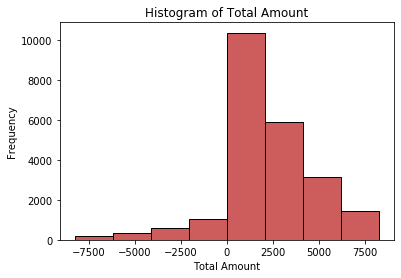

In [42]:
Continous_Var.total_amt.plot(kind = "hist", bins = 8, color = "indianred", edgecolor = "black")
plt.xlabel("Total Amount")
plt.title("Histogram of Total Amount")
plt.show()

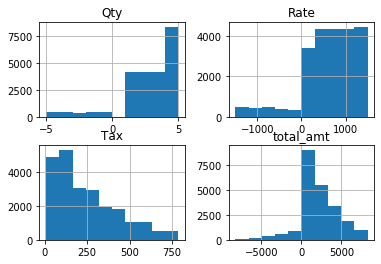

In [43]:
Continous_Var.hist()
plt.show()

- Frequency Bar Graph of Categorical Variables

In [44]:
Categorical_Variable.columns

Index(['Gender', 'Store_type', 'city_code', 'prod_cat', 'prod_cat_code',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

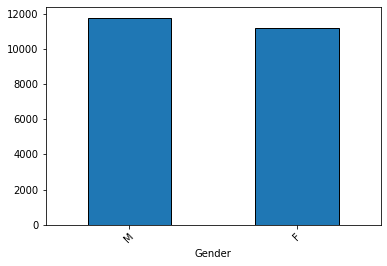

In [45]:
Gender.plot(kind = "bar",edgecolor = "black",legend = False)
plt.xticks(rotation= 45)
plt.xlabel("Gender")
plt.show()

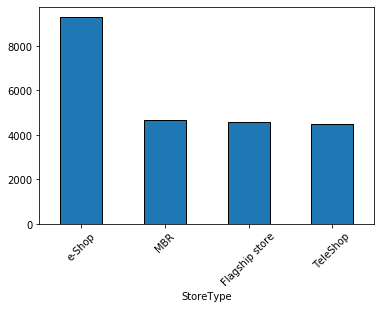

In [46]:
StoreType.plot(kind = "bar",edgecolor = "black",legend = False)
plt.xticks(rotation= 45)
plt.xlabel("StoreType")
plt.show()

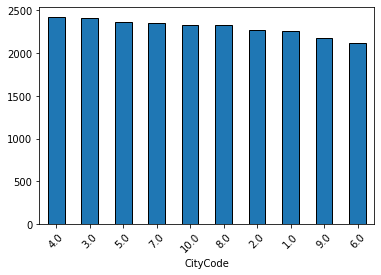

In [47]:
CityCode.plot(kind = "bar",edgecolor = "black",legend = False)
plt.xticks(rotation= 45)
plt.xlabel("CityCode")
plt.show()

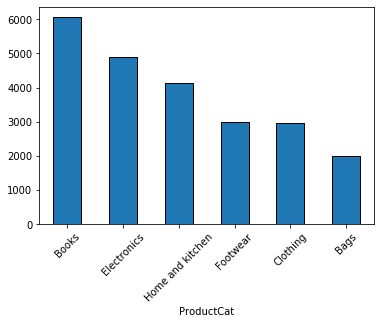

In [48]:
ProductCat.plot(kind = "bar",edgecolor = "black",legend = False)
plt.xticks(rotation= 45)
plt.xlabel("ProductCat")
plt.show()

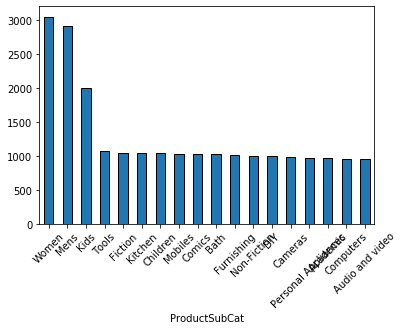

In [49]:
ProductSubCat.plot(kind = "bar",edgecolor = "black",legend = False)
plt.xticks(rotation= 45)
plt.xlabel("ProductSubCat")
plt.show()

#### 4. Calculate the following information using the merged dataset :
- a. Time period of the available transaction data
 - Availabe Transaction Data is from 2011-01-02 to 2014-12-02
 
### Transaction date from the Transactions Sheets gives the time range from *'2011-01-25'* to *'2014-02-28'*  
  - Remark : I Can not understand the difference between these two answers

In [50]:
Customer_Final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [54]:
Tran_Date = Customer_Final.tran_date
Tran_Date.sort_values()

21325   2011-01-02
19150   2011-01-02
21774   2011-01-02
3373    2011-01-02
15157   2011-01-02
           ...    
13804   2014-12-02
11381   2014-12-02
16036   2014-12-02
5941    2014-12-02
12510   2014-12-02
Name: tran_date, Length: 23036, dtype: datetime64[ns]

In [55]:
#k = Transaction.tran_date
#k = pd.Series(k)
#k = pd.to_datetime(k).dt.normalize()
#k.sort_values

<bound method Series.sort_values of 0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]>

##### - b. Count of transactions where the total amount of transaction was negative
  - Count is 2176 where total amount is negative

In [56]:
Trans_Count_Negative = Customer_Final.total_amt[Customer_Final.total_amt<0].count()

In [57]:
Trans_Count_Negative

2176

#### 5. Analyze which product categories are more popular among females vs male customers.
  - **Books** are more popular among Males and Females both

In [58]:
Male_Popular = Customer_Final.loc[Customer_Final.Gender == "M"]

In [59]:
Male_Popular

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
5,274630,1970-01-02,M,4.0,78357345891,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,1970-01-02,M,4.0,23916816961,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
9,272883,1970-02-19,M,5.0,35308880657,2013-01-12,7,5,-4,-1161,487.620,-5131.620,TeleShop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23021,267134,1992-09-14,M,2.0,54777771204,2012-07-15,10,5,5,671,352.275,3707.275,MBR,Books,10,Non-Fiction
23022,267167,1992-10-26,M,6.0,69861996576,2011-08-23,10,5,-2,-862,181.020,-1905.020,MBR,Books,10,Non-Fiction
23023,267167,1992-10-26,M,6.0,69861996576,2011-08-14,10,5,2,862,181.020,1905.020,MBR,Books,10,Non-Fiction
23025,273233,1992-12-11,M,2.0,75207962984,2013-07-04,10,5,5,1002,526.050,5536.050,TeleShop,Books,10,Non-Fiction


In [60]:
Male_Popular.prod_cat.value_counts()

Books               3115
Electronics         2568
Home and kitchen    2132
Clothing            1518
Footwear            1469
Bags                1003
Name: prod_cat, dtype: int64

In [61]:
Female_Popular = Customer_Final.loc[Customer_Final.Gender == "F"]

In [62]:
Female_Popular.prod_cat.value_counts()

Books               2949
Electronics         2326
Home and kitchen    1994
Footwear            1529
Clothing            1439
Bags                 994
Name: prod_cat, dtype: int64

In [63]:
#ff = Male_Popular.groupby(by = "prod_cat")[["prod_cat"]].count()

In [64]:
#ff

#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?
   - City Code 3 have maximum customer as per the merged data 
   - 10.46% of customers are from City 3

In [65]:
Customer_Count = Customer_Final.loc[:,("customer_Id","city_code")]

In [66]:
Customer_Count = Customer_Count.loc[-(Customer_Count.customer_Id.duplicated())]

In [67]:
Customer_Count

,customer_Id,city_code
0,268408,4.0
1,275152,4.0
2,275034,4.0
3,270829,8.0
4,267657,7.0
...,...,...
22857,272147,9.0
22864,270805,9.0
22925,270943,7.0
22977,269450,7.0


In [68]:
Customer_Count = Customer_Count.groupby(by=["city_code"])[["customer_Id"]].count()

In [69]:
Customer_Count = Customer_Count.sort_values(by = "customer_Id",ascending=False).reset_index()
Customer_Count

,city_code,customer_Id
0,3.0,576
1,5.0,570
2,4.0,569
3,7.0,563
4,8.0,551
5,10.0,546
6,2.0,545
7,1.0,535
8,9.0,532
9,6.0,515


In [70]:
#Customer_Final.to_excel (r'/Users/abhishek/Desktop/Python Data/3. Pandas Case Study 1 - Retail Case Study\export_dataframe.xlsx', index = False, header=True)

In [71]:
total_cust = Customer_Count.customer_Id.sum()

In [72]:
total_cust

5502

In [73]:
City3_cust = Customer_Count.customer_Id[Customer_Count.city_code==3.0]

In [74]:
City3_cust

0    576
Name: customer_Id, dtype: int64

In [75]:
Percentage_Of_Customer_From_City3 = City3_cust/total_cust*100
Percentage_Of_Customer_From_City3

0    10.46892
Name: customer_Id, dtype: float64

#### 7. Which store type sells the maximum products by value and by quantity?
  - e-Shop sells the maximum products by value and quantity

In [76]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction


In [77]:
StoreType = Customer_Final.groupby(by="Store_type")[["total_amt","Qty"]].sum().reset_index()

In [78]:
StoreType

,Store_type,total_amt,Qty
0,Flagship store,9.714802e+06,11131
1,MBR,9.667300e+06,11187
2,TeleShop,9.341038e+06,10959
3,e-Shop,1.982114e+07,22758


In [79]:
StoreType.sort_values(by = ["total_amt","Qty"],ascending=[False,False])

,Store_type,total_amt,Qty
3,e-Shop,1.982114e+07,22758
0,Flagship store,9.714802e+06,11131
1,MBR,9.667300e+06,11187
2,TeleShop,9.341038e+06,10959


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
  - Total Amount Earned from Electroinc and Clothing Categories under Flagshi Stores is 3408936.05

In [80]:
FlagShip_Earning = Customer_Final.loc[Customer_Final.Store_type=="Flagship store"]

In [81]:
r = FlagShip_Earning.total_amt[(FlagShip_Earning.prod_cat =="Electronics") | (FlagShip_Earning.prod_cat=="Clothing")].sum()

In [82]:
r.round(2)

3408936.05

#### 9. What was the total amount earned from "Male" customers under the "Electronics" category?
  - Amount Earned from Male Customers under Electronics Category is 5697629.73

In [83]:
Customer_Final.total_amt[(Customer_Final.Gender=="M")&((Customer_Final.prod_cat=="Electronics"))].sum()

5697629.73

#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?
  - 6 Customers as have more than 10 Unique Transactions
  
#### There is no record for Customer_ID "273014" in Customer_Final dataframe, I have no clue how this id is appearing in my answer  

In [84]:
Positive_Transactions = Customer_Final.loc[Customer_Final.total_amt >0]

In [85]:
Positive_Transactions.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,1970-01-16,M,4.0,73109425404,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,1970-01-18,F,4.0,64777271023,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,1970-01-22,F,8.0,87174343938,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,1970-01-29,F,7.0,76242744953,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction


In [86]:
#Positive_Transactions.transaction_id[(Positive_Transactions.transaction_id.duplicated())]

In [87]:
g = Positive_Transactions.groupby(by= "customer_Id")[["transaction_id"]].count()
g

,transaction_id
customer_Id,
266783,4
266784,3
266785,7
266788,4
266794,11
...,...
275257,4
275261,3
275262,2


In [88]:
g.loc[g.transaction_id>10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


#### 11. For all customers aged between 25 - 35, find out:
 - a. What was the total amount spent for “Electronics” and “Books” product categories?

In [111]:
#def age(x,*l):
#    f = []
#    for i in l:
#       days = x-l
#        age = days/365.25
#        f.append[age] 
#    return(age)    

In [130]:
today = pd.datetime.today()
today = pd.to_datetime(today)
today.year

2020

In [126]:
#c = list(age(x=today,*l))

In [136]:
o = Customer_Final.DOB
o = pd.to_datetime(o)
o.dt.year

0        1970
1        1970
2        1970
3        1970
4        1970
         ... 
23031    1992
23032    1992
23033    1992
23034    1992
23035    1992
Name: DOB, Length: 23036, dtype: int64

In [138]:
today = pd.Series(today)
today

0   2020-05-20 08:00:48.817904
dtype: datetime64[ns]

In [139]:
today.dt.year

0    2020
dtype: int64

In [140]:
np.where(o.dt.year<today.dt.year,today.dt.year-o.dt.year,today.dt.year)

ValueError: Can only compare identically-labeled Series objects